# Lab 7

## Event Selection Optimization

You and your lab partner should pick different pT (transverse momentum) samples (one uses low-pT sampels and the other use high-pT samples) for this lab. In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to given expected yields accordingly (See Dataset descriptions).

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import poisson
from scipy.stats import norm
import pickle
import pandas as pd

In [2]:
# pickle read higgs and qcd files
higgs_file = open("Higgs_data/Sample_pt_250_500/higgs_100000_pt_250_500.pkl", 'rb')
higgs_dict = pickle.load(higgs_file)
qcd_file = open("Higgs_data/Sample_pt_250_500/qcd_100000_pt_250_500.pkl", 'rb')
qcd_dict = pickle.load(qcd_file)

print(higgs_dict.keys()) # qcd_dict has same keys

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [3]:
# pull out the arrays
pt_h = higgs_dict['pt']
eta_h = higgs_dict['eta']
phi_h = higgs_dict['phi']
mass_h = higgs_dict['mass']
ee2_h = higgs_dict['ee2']
ee3_h = higgs_dict['ee3']
d2_h = higgs_dict['d2']
ang_h = higgs_dict['angularity']
t1_h = higgs_dict['t1']
t2_h = higgs_dict['t2']
t3_h = higgs_dict['t3']
t21_h = higgs_dict['t21']
t32_h = higgs_dict['t32']
KtDeltaR_h = higgs_dict['KtDeltaR']

pt_q = qcd_dict['pt']
eta_q = qcd_dict['eta']
phi_q = qcd_dict['phi']
mass_q = qcd_dict['mass']
ee2_q = qcd_dict['ee2']
ee3_q = qcd_dict['ee3']
d2_q = qcd_dict['d2']
ang_q = qcd_dict['angularity']
t1_q = qcd_dict['t1']
t2_q = qcd_dict['t2']
t3_q = qcd_dict['t3']
t21_q = qcd_dict['t21']
t32_q = qcd_dict['t32']
KtDeltaR_q = qcd_dict['KtDeltaR']

## Problem 1

Make a stacked histogram plot for the feature variable: mass.

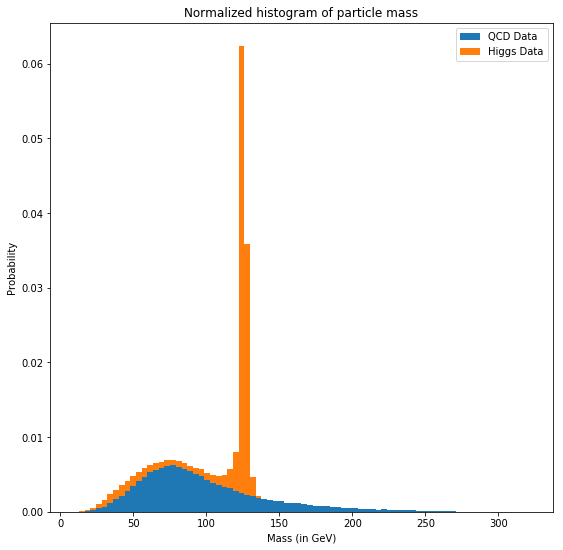

In [4]:
# Ok, we need to make this normalized, and want to stack h mass and q mass
figure = plt.figure(figsize=(9, 9))
ax = figure.subplots()

n, bins, patches = ax.hist([mass_q, mass_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of particle mass")
ax.set_ylabel("Probability")
ax.set_xlabel("Mass (in GeV)")
ax.legend(["QCD Data", "Higgs Data"]);

Evaluate expected significance without any event selection.

In [5]:
# given N_qcd and N_higgs
N_qcd = 20000
N_higgs = 100

# Poisson statistics significance calculation
poisson_probability = poisson.cdf(N_qcd + N_higgs, N_qcd)
poisson_significance = norm.ppf(poisson_probability)
print("Poisson: " + str(poisson_significance))

analytic_probability = N_higgs / np.sqrt(N_qcd)
analytic_significance = norm.ppf(analytic_probability)
print("Analytic: " + str(analytic_significance))

Poisson: 0.7112259282313185
Analytic: 0.5449521356173602


The analytic significance is smaller than the poisson significance, which is interesting but seems reasonable because I don't understand why adding stuff is supposed to work. Neither are very good though, and something passing these thresholds doesn't really imply anything.

## Problem 2

Identify mass cuts to optimize the expected sigificance. Try different mass cuts systematically.

The optimal mass cuts will occur around the higgs value spike, so we want to find count values for that. Lets slice up masses into 5 chunks.

Evaluate expected significance for each set of mass cuts. Identify the set of the mass cuts which give you the highest significance.

In [6]:
# tweakables. Made generic for use later potentially.
feature_h = mass_h
feature_q = mass_q
cuts = 5    # breaks on cuts = 1 for some reason
start = 100
end = 150

# calculated
cut_size = (end - start) / cuts
cut_N_higgs = 0 # will result in 0% significance if no higgs data found
cut_N_qcd = 1 # prevents divide by 0 error
t_higgs = len(feature_h)
t_qcd = len(feature_q)

# outputs
best_probability = 0.0
best_lower = 0
best_upper = 0

for idx in range(0, cuts):
    lower = start + idx*cut_size
    upper = lower + cut_size
    
    # np.where returns a tuple for unknowable reasons, so we have to
    # extract the actually usable part.
    cut_h = np.where(np.logical_and(feature_h >= lower, 
                                    feature_h <= upper))[0]
    cut_q = np.where(np.logical_and(feature_q >= lower, 
                                    feature_q <= upper))[0]
    
    cut_N_higgs = len(cut_h) / t_higgs * N_higgs
    cut_N_qcd = len(cut_q) / t_qcd * N_qcd
    
    # Using this method because for some reason the other way doesn't
    # necessarily get a value between 0 and 1
    cut_probability = poisson.cdf(cut_N_higgs + cut_N_qcd, cut_N_qcd)
    
    if cut_probability > best_probability:
        best_probability = cut_probability
        best_lower = lower
        best_upper = upper
        best_N_higgs = cut_N_higgs
        best_N_qcd = cut_N_qcd

best_significance = norm.ppf(best_probability)
print("Best significance: " + str(best_significance))
print("Best cut: " + str(best_lower) + " - " + str(best_upper))

Best significance: 2.411688648925931
Best cut: 120.0 - 130.0


This significance is significantly better then uncut! Still not good enough for being used, but still a much needed improvement.

## Problem 3

Make stacked histogram plots for the rest of features.

Set A of plots without any selection. Can you identify another feature as discriminative as mass?

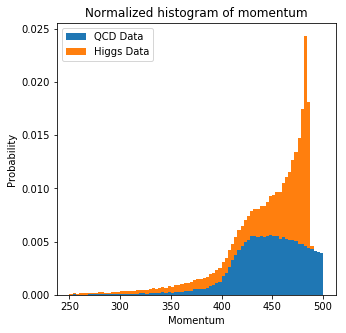

In [35]:
# Momentum
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([pt_q, pt_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of momentum")
ax.set_ylabel("Probability")
ax.set_xlabel("Momentum")
ax.legend(["QCD Data", "Higgs Data"]);

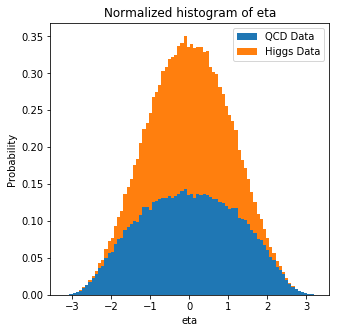

In [37]:
# eta
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([eta_q, eta_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of eta")
ax.set_ylabel("Probability")
ax.set_xlabel("eta")
ax.legend(["QCD Data", "Higgs Data"]);

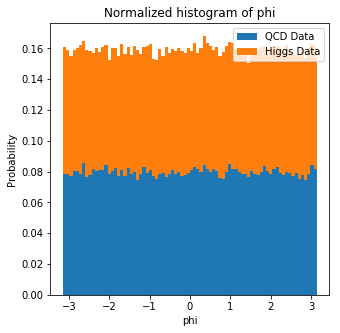

In [38]:
# phi
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([phi_q, phi_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of phi")
ax.set_ylabel("Probability")
ax.set_xlabel("phi")
ax.legend(["QCD Data", "Higgs Data"]);

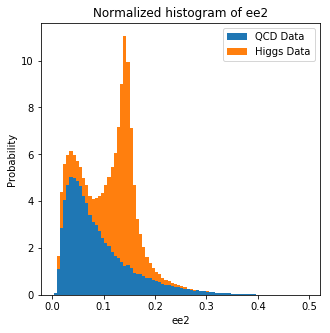

In [40]:
# ee2
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([ee2_q, ee2_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of ee2")
ax.set_ylabel("Probability")
ax.set_xlabel("ee2")
ax.legend(["QCD Data", "Higgs Data"]);

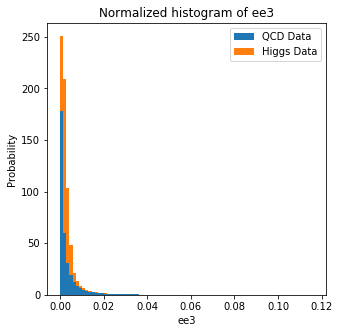

In [41]:
# eta
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([ee3_q, ee3_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of ee3")
ax.set_ylabel("Probability")
ax.set_xlabel("ee3")
ax.legend(["QCD Data", "Higgs Data"]);

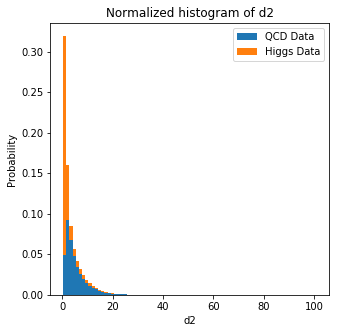

In [42]:
# d2
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([d2_q, d2_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of d2")
ax.set_ylabel("Probability")
ax.set_xlabel("d2")
ax.legend(["QCD Data", "Higgs Data"]);

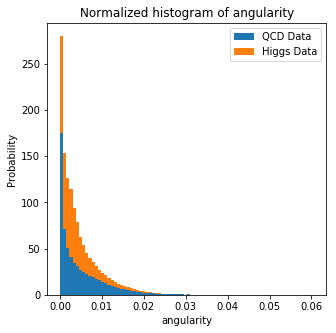

In [43]:
# angularity
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([ang_q, ang_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of angularity")
ax.set_ylabel("Probability")
ax.set_xlabel("angularity")
ax.legend(["QCD Data", "Higgs Data"]);

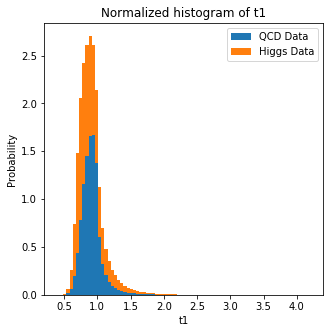

In [44]:
# t1
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t1_q, t1_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of t1")
ax.set_ylabel("Probability")
ax.set_xlabel("t1")
ax.legend(["QCD Data", "Higgs Data"]);

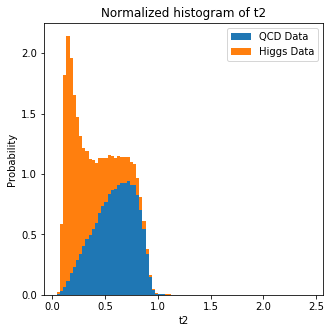

In [45]:
# t2
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t2_q, t2_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of t2")
ax.set_ylabel("Probability")
ax.set_xlabel("t2")
ax.legend(["QCD Data", "Higgs Data"]);

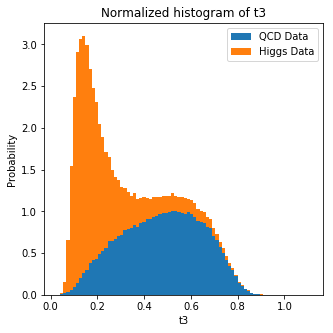

In [46]:
# t3
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t3_q, t3_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of t3")
ax.set_ylabel("Probability")
ax.set_xlabel("t3")
ax.legend(["QCD Data", "Higgs Data"]);

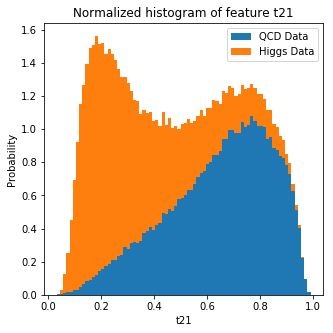

In [7]:
# t21
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t21_q, t21_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of feature t21")
ax.set_ylabel("Probability")
ax.set_xlabel("t21")
ax.legend(["QCD Data", "Higgs Data"]);

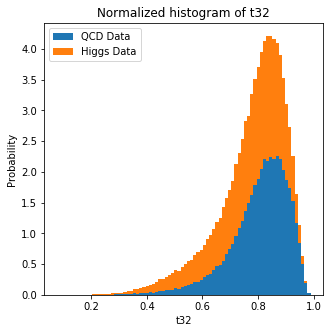

In [47]:
# t32
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t32_q, t32_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of t32")
ax.set_ylabel("Probability")
ax.set_xlabel("t32")
ax.legend(["QCD Data", "Higgs Data"]);

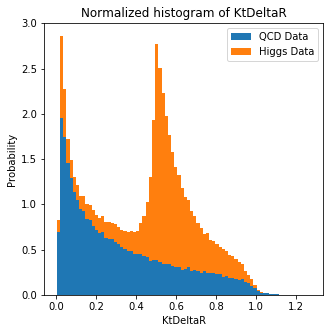

In [48]:
# KtDeltaR
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([KtDeltaR_q, KtDeltaR_h], bins=80, 
                           stacked=True, density=True);
ax.set_title("Normalized histogram of KtDeltaR")
ax.set_ylabel("Probability")
ax.set_xlabel("KtDeltaR")
ax.legend(["QCD Data", "Higgs Data"]);

Set B of plots with your optimal mass cuts. Can you identify additional features to further improve expected significance?

In [10]:
# Now lets take a look at the mass cut portions.
lower = best_lower # from above
upper = best_upper

mass_cut_h = np.where(np.logical_and(mass_h >= lower, 
                                           mass_h <= upper))[0]
mass_cut_q = np.where(np.logical_and(mass_q >= lower, 
                                           mass_q <= upper))[0]


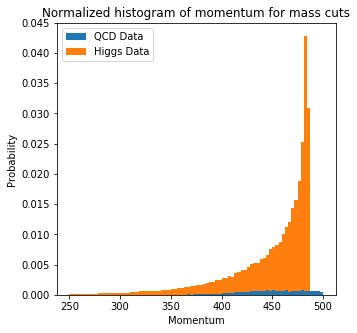

In [50]:
# momentum
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([pt_q[mass_cut_q], pt_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of momentum for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("Momentum")
ax.legend(["QCD Data", "Higgs Data"]);

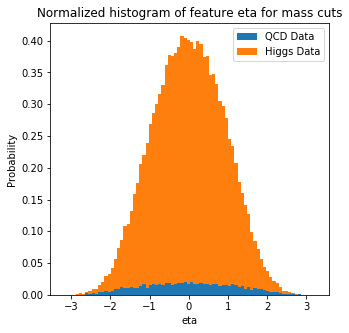

In [51]:
# eta
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([eta_q[mass_cut_q], eta_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature eta for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("eta")
ax.legend(["QCD Data", "Higgs Data"]);

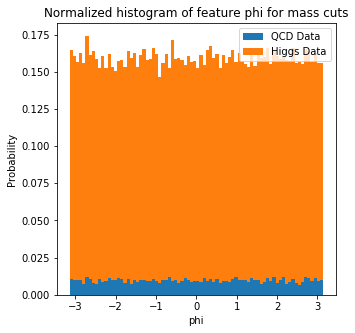

In [53]:
# phi
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([phi_q[mass_cut_q], phi_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature phi for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("phi")
ax.legend(["QCD Data", "Higgs Data"]);

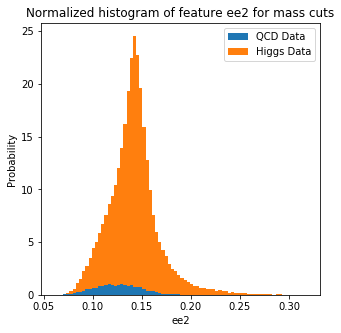

In [56]:
### ee2
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([ee2_q[mass_cut_q], ee2_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature ee2 for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("ee2")
ax.legend(["QCD Data", "Higgs Data"]);

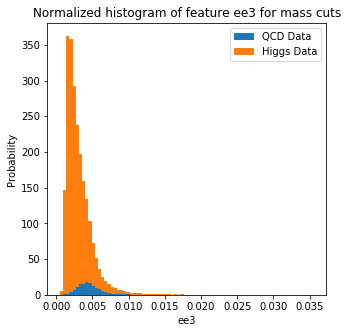

In [57]:
# ee3
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([ee3_q[mass_cut_q], ee3_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature ee3 for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("ee3")
ax.legend(["QCD Data", "Higgs Data"]);

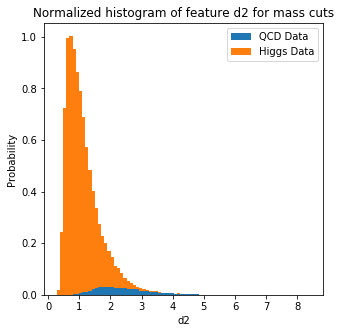

In [58]:
# d2
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([d2_q[mass_cut_q], d2_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature d2 for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("d2")
ax.legend(["QCD Data", "Higgs Data"]);

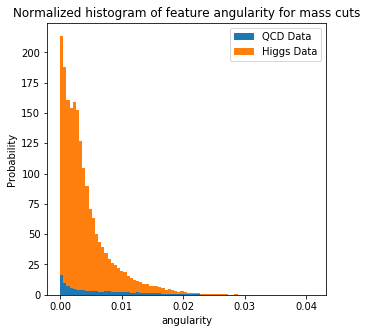

In [59]:
# ang
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([ang_q[mass_cut_q], ang_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature angularity for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("angularity")
ax.legend(["QCD Data", "Higgs Data"]);

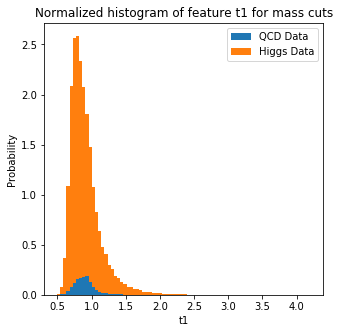

In [60]:
# t1
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t1_q[mass_cut_q], t1_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature t1 for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("t1")
ax.legend(["QCD Data", "Higgs Data"]);

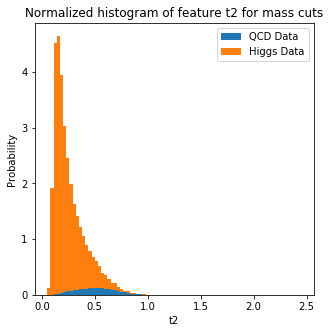

In [61]:
# t2
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t2_q[mass_cut_q], t2_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature t2 for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("t2")
ax.legend(["QCD Data", "Higgs Data"]);

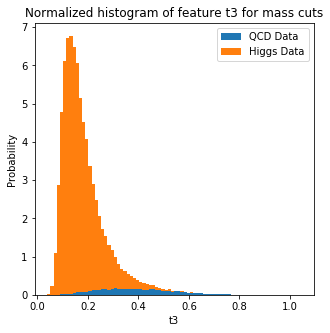

In [62]:
# t3
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t3_q[mass_cut_q], t3_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature t3 for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("t3")
ax.legend(["QCD Data", "Higgs Data"]);

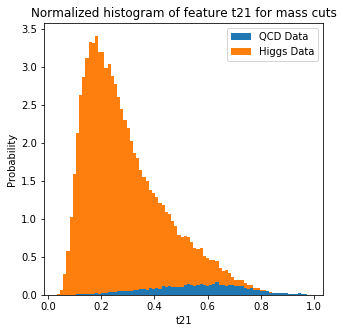

In [11]:
# t21
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t21_q[mass_cut_q], t21_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature t21 for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("t21")
ax.legend(["QCD Data", "Higgs Data"]);

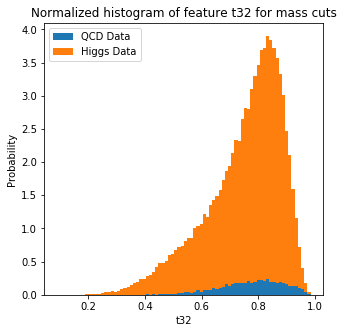

In [63]:
# t32
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([t32_q[mass_cut_q], t32_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature t32 for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("t32")
ax.legend(["QCD Data", "Higgs Data"]);

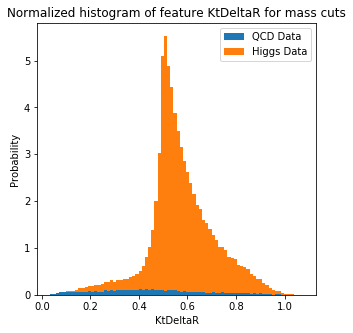

In [64]:
# KtDeltaR
figure = plt.figure(figsize=(5, 5))
ax = figure.subplots()

n, bins, patches = ax.hist([KtDeltaR_q[mass_cut_q], KtDeltaR_h[mass_cut_h]], 
                           bins=80, stacked=True, density=True);
ax.set_title("Normalized histogram of feature KtDeltaR for mass cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("KtDeltaR")
ax.legend(["QCD Data", "Higgs Data"]);

Most of these seem like good options since they are all mostly higgs data, with the exception of phi not really having good peaks for the higgs data. I think in this next section we shall look at KtDeltaR, as that set has a very nice spike from around 0.4 to 0.7 

## Problem 4
Optimize event selections using multiple features (if necessary)

Find a set of feature cuts which can help you to achieve the best significance.

In [66]:
# tweakables. Haha, I knew this would happen!
feature_h = KtDeltaR_h[mass_cut_h]
feature_q = KtDeltaR_q[mass_cut_q]
cuts = 10  # breaks on cuts = 1 for some reason 
start = 0.4
end = 0.7

# calculated
cut_size = (end - start) / cuts
cut_N_higgs = 0 # will result in 0% significance if no higgs data found
cut_N_qcd = 1 # prevents divide by 0 error
t_higgs = len(pt_h) # scale to original
t_qcd = len(pt_h)

# outputs
best_probability = 0.0
best_lower = 0
best_upper = 0

for idx in range(0, cuts):
    lower = start + idx*cut_size
    upper = lower + cut_size
    
    # np.where returns a tuple for unknowable reasons, so we have to
    # extract the actually usable part.
    cut_h = np.where(np.logical_and(feature_h >= lower, 
                                    feature_h <= upper))[0]
    cut_q = np.where(np.logical_and(feature_q >= lower, 
                                    feature_q <= upper))[0]
    
    cut_N_higgs = len(cut_h) / t_higgs * best_N_higgs
    cut_N_qcd = len(cut_q) / t_qcd * best_N_qcd
    
    # Using this method because for some reason the other way doesn't
    # necessarily get a value between 0 and 1
    cut_probability = poisson.cdf(cut_N_higgs + cut_N_qcd, cut_N_qcd)
    
    if cut_probability > best_probability:
        best_probability = cut_probability
        best_lower = lower
        best_upper = upper
        best_cut_q = cut_q
        best_cut_h = cut_h

best_significance = norm.ppf(best_probability)
print("Best significance: " + str(best_significance))
print("Best cut: " + str(best_lower) + " - " + str(best_upper))

Best significance: 4.592806889487479
Best cut: 0.49 - 0.52


Thats pretty good! Lets see if something else looks nice. The momentum graph also has a pretty nice spike around 400 to 500.

In [68]:
# tweakables.
feature_h = pt_h[mass_cut_h]
feature_q = pt_q[mass_cut_q]
cuts = 10    # breaks on cuts = 1 for some reason 
start = 400
end = 500

# calculated
cut_size = (end - start) / cuts
cut_N_higgs = 0 # will result in 0% significance if no higgs data found
cut_N_qcd = 1 # prevents divide by 0 error
t_higgs = len(pt_h) # scale to original
t_qcd = len(pt_h)

# outputs
best_probability = 0.0
best_lower = 0
best_upper = 0

for idx in range(0, cuts):
    lower = start + idx*cut_size
    upper = lower + cut_size
    
    # np.where returns a tuple for unknowable reasons, so we have to
    # extract the actually usable part.
    cut_h = np.where(np.logical_and(feature_h >= lower, 
                                    feature_h <= upper))[0]
    cut_q = np.where(np.logical_and(feature_q >= lower, 
                                    feature_q <= upper))[0]
    
    cut_N_higgs = len(cut_h) / t_higgs * best_N_higgs
    cut_N_qcd = len(cut_q) / t_qcd * best_N_qcd
    
    # Using this method because for some reason the other way doesn't
    # necessarily get a value between 0 and 1
    cut_probability = poisson.cdf(cut_N_higgs + cut_N_qcd, cut_N_qcd)
    
    if cut_probability > best_probability:
        best_probability = cut_probability
        best_lower = lower
        best_upper = upper
        best_cut_q = cut_q
        best_cut_h = cut_h

best_significance = norm.ppf(best_probability)
print("Best significance: " + str(best_significance))
print("Best cut: " + str(best_lower) + " - " + str(best_upper))

Best significance: 5.438154089185145
Best cut: 480.0 - 490.0


This new significance is excellent! It surpasses our desired certainty of 5 sigma, and we can now say that this data is almost certainly that of the signal. Looking at the stacked histograms, it seems highly reasonable to say that this is an effective methodology.

Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

My initial sigma was 0.71, peaking at 2.41 with mass cuts, and an impressive 5.44 for mass and momentum cuts. My partner achieved a jump from 1.1282 to 5.9323 sigma, also an excellent increase in significance.

# Lab 8

## Pseudo-experiment data analysis

Using your optimized event selection, hunt for your signal by using one of the pseudo-experiment dataset. For each task below, you will choose one of the observed data from your specific pT sample to perform the analysis.

In [69]:
hi_lumi_file = "Higgs_data/Sample_pt_250_500/data_highLumi_pt_250_500.h5"
hi_data = pd.read_hdf(hi_lumi_file)

lo_lumi_file = "Higgs_data/Sample_pt_250_500/data_lowLumi_pt_250_500.h5"
lo_data = pd.read_hdf(lo_lumi_file)

In [70]:
# I will use my mass and momentum data since that gave me the best 
# significance when simulated
mass_hi = hi_data["mass"]
pt_hi = hi_data["pt"]
mass_lo = lo_data["mass"]
pt_lo = lo_data["pt"]

## High luminosity data

Focus on each feature of your event selection. Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.

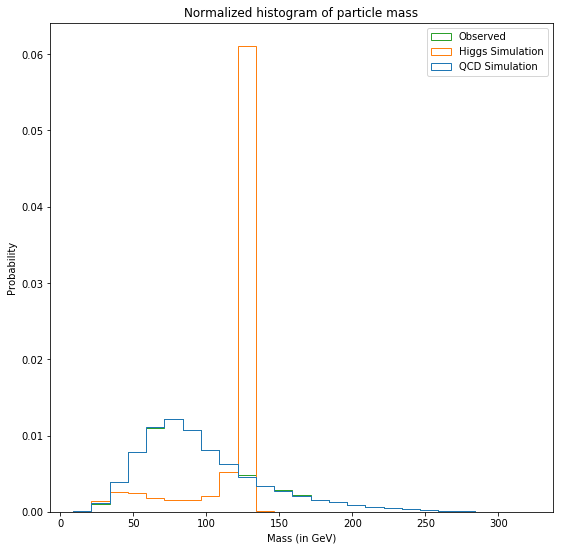

In [75]:
# this is just showing off another one of these histograms, this time
# not stacked
figure = plt.figure(figsize=(9, 9))
ax = figure.subplots()

n, bins, patches = ax.hist([mass_q, mass_h, mass_hi], bins=25, 
                           histtype='step', density=True);
ax.set_title("Normalized histogram of particle mass")
ax.set_ylabel("Probability")
ax.set_xlabel("Mass (in GeV)")
# Dear god, why is the order reversed for the legend now? I swear...
ax.legend(["Observed", "Higgs Simulation", "QCD Simulation"]);

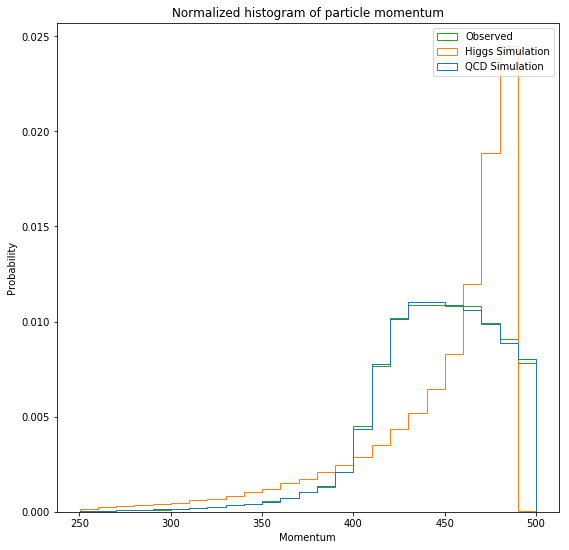

In [74]:
# momentum
figure = plt.figure(figsize=(9, 9))
ax = figure.subplots()

n, bins, patches = ax.hist([pt_q, pt_h, pt_hi], bins=25, 
                           histtype='step', density=True);
ax.set_title("Normalized histogram of particle momentum")
ax.set_ylabel("Probability")
ax.set_xlabel("Momentum")
# Dear god, why is the order reversed for the legend now? I swear...
ax.legend(["Observed", "Higgs Simulation", "QCD Simulation"]);

The observed data is very close to the background simulation, except for a small but visible bump at the higgs data spikes. This makes sense, as these events are supposed to be rare so having it look mostly like background is pretty reasonable.

Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.

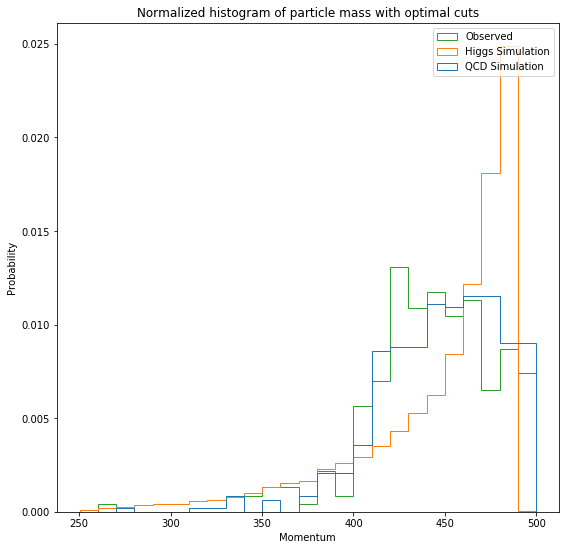

In [90]:
# I shall use the best cuts from lab 7 on the observed data, as that will
# provide the best data

#mass cuts
mass_lower = 120
mass_upper = 130

cut_h = np.where(np.logical_and(mass_h >= mass_lower, 
                                mass_h <= mass_upper))[0]
cut_q = np.where(np.logical_and(mass_q >= mass_lower, 
                                mass_q <= mass_upper))[0]
cut_hi = np.where(np.logical_and(mass_hi >= mass_lower, 
                                 mass_hi <= mass_upper))[0]

#momentum cuts
pt_lower = 480
pt_upper = 490

optimal_h = pt_h[np.where(np.logical_and(pt_h[cut_h] >= pt_lower,
                                        pt_h[cut_h] <= pt_upper))[0]]
optimal_q = pt_q[np.where(np.logical_and(pt_q[cut_q] >= pt_lower,
                                        pt_q[cut_q] <= pt_upper))[0]]
optimal_hi = pt_hi[np.where(np.logical_and(pt_hi[cut_hi] >= pt_lower,
                                        pt_hi[cut_hi] <= pt_upper))[0]]

figure = plt.figure(figsize=(9, 9))
ax = figure.subplots()

n, bins, patches = ax.hist([optimal_q, optimal_h, optimal_hi], bins=25, 
                           histtype='step', density=True);
ax.set_title("Normalized histogram of particle mass with optimal cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("Momentum")
ax.legend(["Observed", "Higgs Simulation", "QCD Simulation"]);

Evaluate observed significance and compare your results to expectation.

In [98]:
# Thanks to Dan, I think I get whats going on here. We have a certain
# number of counts for our simulated background here, but we need to
# normalize that number of counts so that we have a background to compare
# our experimental data against. 

normalizer = len(optimal_q) / N_qcd
cut_N_qcd = normalizer * len(mass_hi) # gets us what we expect background
                                      # counts to be for this number of points
cut_N_hi = len(optimal_hi)

probability = poisson.cdf(cut_N_hi + cut_N_qcd, cut_N_qcd)
significance = norm.ppf(probability)
print("High luminosity cut significance: " + str(significance))

High luminosity cut significance: 7.15941159399559


This seems like some excellent significance to me, and this data seems highly useable. It would seem probable that experimental data within this range would suggest it is a signal. How excellent!

## Low luminosity data

Focus on each feature of your event selection. Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.

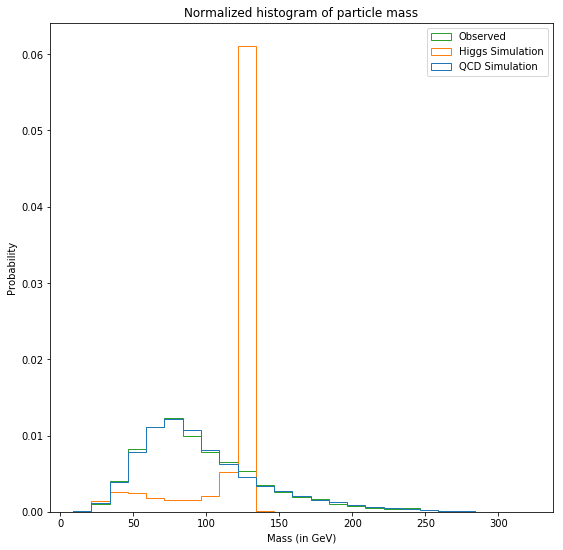

In [100]:
# Same code as high luminosity data throughout
figure = plt.figure(figsize=(9, 9))
ax = figure.subplots()

n, bins, patches = ax.hist([mass_q, mass_h, mass_lo], bins=25, 
                           histtype='step', density=True);
ax.set_title("Normalized histogram of particle mass")
ax.set_ylabel("Probability")
ax.set_xlabel("Mass (in GeV)")
# Dear god, why is the order reversed for the legend now? I swear...
ax.legend(["Observed", "Higgs Simulation", "QCD Simulation"]);

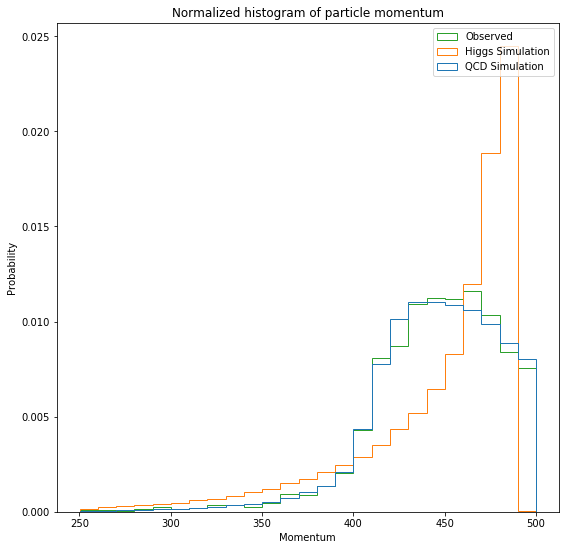

In [101]:
# momentum
figure = plt.figure(figsize=(9, 9))
ax = figure.subplots()

n, bins, patches = ax.hist([pt_q, pt_h, pt_lo], bins=25, 
                           histtype='step', density=True);
ax.set_title("Normalized histogram of particle momentum")
ax.set_ylabel("Probability")
ax.set_xlabel("Momentum")
# Dear god, why is the order reversed for the legend now? I swear...
ax.legend(["Observed", "Higgs Simulation", "QCD Simulation"]);

Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.

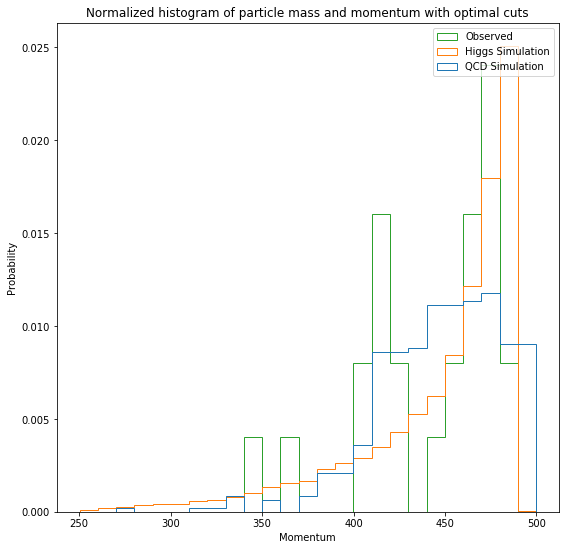

In [105]:
# I shall use the best cuts from lab 7 on the observed data, as that will
# provide the best data

#mass cuts
mass_lower = 120
mass_upper = 130

cut_h = np.where(np.logical_and(mass_h >= mass_lower, 
                                mass_h <= mass_upper))[0]
cut_q = np.where(np.logical_and(mass_q >= mass_lower, 
                                mass_q <= mass_upper))[0]
cut_lo = np.where(np.logical_and(mass_lo >= mass_lower, 
                                 mass_lo <= mass_upper))[0]

#momentum cuts
pt_lower = 480
pt_upper = 490

optimal_h = pt_h[np.where(np.logical_and(pt_h[cut_h] >= pt_lower,
                                        pt_h[cut_h] <= pt_upper))[0]]
optimal_q = pt_q[np.where(np.logical_and(pt_q[cut_q] >= pt_lower,
                                        pt_q[cut_q] <= pt_upper))[0]]
optimal_lo = pt_lo[np.where(np.logical_and(pt_lo[cut_lo] >= pt_lower,
                                        pt_lo[cut_lo] <= pt_upper))[0]]

figure = plt.figure(figsize=(9, 9))
ax = figure.subplots()

n, bins, patches = ax.hist([optimal_q, optimal_h, optimal_lo], bins=25, 
                           histtype='step', density=True);
ax.set_title("Normalized histogram of particle mass and momentum with optimal cuts")
ax.set_ylabel("Probability")
ax.set_xlabel("Momentum")
ax.legend(["Observed", "Higgs Simulation", "QCD Simulation"]);

Evaluate observed significance and compare your results to expectation.

In [104]:
normalizer = len(optimal_q) / N_qcd
cut_N_qcd = normalizer * len(mass_lo) # gets us what we expect background
                                      # counts to be for this number of points
cut_N_lo = len(optimal_lo)

probability = poisson.cdf(cut_N_lo + cut_N_qcd, cut_N_qcd)
significance = norm.ppf(probability)
print("High luminosity cut significance: " + str(significance))

High luminosity cut significance: 2.426726664034485


This significance is significantly worse, but this is to be expected. Low luminosity data is hard to distinguish as the energies are not quite enough to make things clear.

## 95% Confidence Level of signal yields

In the low luminosity data, the observed significance is less than 5 sigma, We will calculate the 95% confidence level upper limit of signal yield.

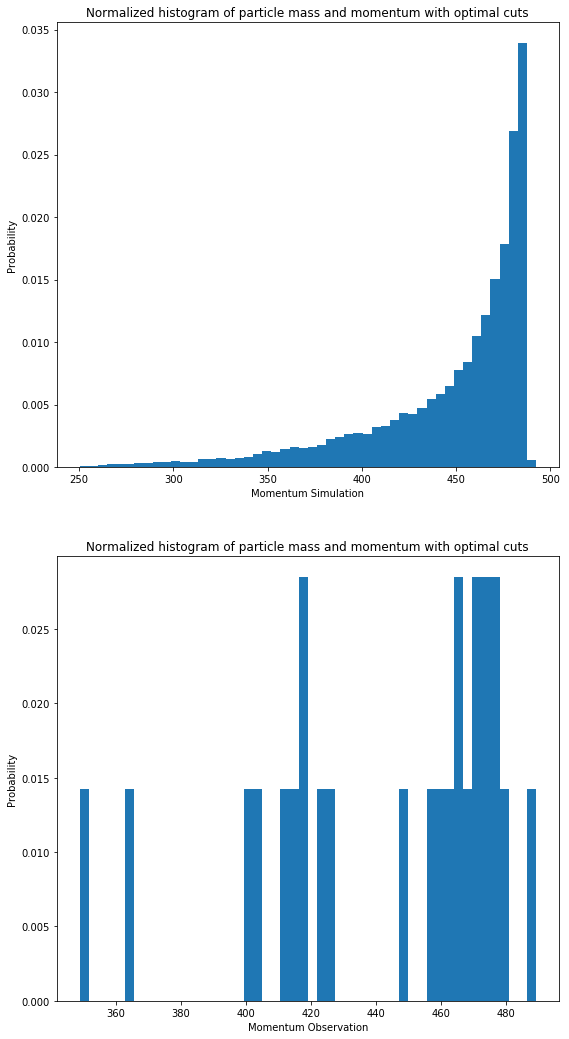

In [133]:
# Lets histogram the cut luminosity data more finely this time so
# we can capture our required values

figure = plt.figure(figsize=(9, 18))
ax = figure.subplots(2, 1)

expected = ax[0]
observed = ax[1]

n_expected, bins_expected, patches = expected.hist(optimal_h, 
                                                   bins=50, density=True);
expected.set_title("Normalized histogram of particle mass and momentum with optimal cuts")
expected.set_ylabel("Probability")
expected.set_xlabel("Momentum Simulation");

n_observed, bins_observed, patches = observed.hist(optimal_lo, 
                                                   bins=50, density=True);
observed.set_title("Normalized histogram of particle mass and momentum with optimal cuts")
observed.set_ylabel("Probability")
observed.set_xlabel("Momentum Observation");

In [134]:
# For some unknowable reason, the "density" functions above are very much
# not summing to 1, so lets try to fix that first by rescaling them
print(sum(n_expected))
n_expected = n_expected * (1 / sum(n_expected))
print(sum(n_expected))

print(sum(n_observed))
n_observed = n_observed * (1 / sum(n_observed))
print(sum(n_observed))

0.20648428772310792
1.0000000000000002
0.35595049912279714
1.0000000000000004


...I don't even know anymore.

Evaluate the expected 95% confidence level upper limit

In [136]:
# This is the confidence of the higgs simulated data
# I can copy this code pretty much exactly from lab 6, since we are just
# finding a 95% confidence upper bound

probability = 0
upper_bound = 0
for idx in range(0, len(n_expected)):
    if probability < 0.95:
        # add probability, move on
        probability += n_expected[idx]
    else:
        # idx is index of the farthest right bins' left edge
        # want the right edge since this bin was added, so
        upper_bound = bins_expected[idx + 1]
        # and want to stop looping since we found what we want
        break

print("The " + str(probability * 100) + 
      "% confidence upper bound is " + str(upper_bound))

The 99.74338259753839% confidence upper bound is 492.3665547192314


Unfortunately, since these are in descrete chunks there isn't much that I can do to fix the percentage being so off 95%.

Evaluate the observed 95% confidence level upper limit

In [137]:
# This is the confidence of the observational data

probability = 0
upper_bound = 0
for idx in range(0, len(n_observed)):
    if probability < 0.95:
        # add probability, move on
        probability += n_observed[idx]
    else:
        # idx is index of the farthest right bins' left edge
        # want the right edge since this bin was added, so
        upper_bound = bins_observed[idx + 1]
        # and want to stop looping since we found what we want
        break

print("The " + str(probability * 100) + 
      "% confidence upper bound is " + str(upper_bound))

The 95.99999999999997% confidence upper bound is 483.67234522428066


This one is surprisingly much closer to 95%, go figure. The fact that 95% to 99% percent of data is less than the upper bounds for the simulation and observation does not surprise me, these seem reasonable.

Compare expectation to observation. Comment on your finding.

My 96% confidence value is much lower for the observed data than the 99% confidence value is for my simulated data. I would be hesitant to use this data for anything, as the significance of similar cuts to high luminosity data is startlingly low in comparison. I would think that it would be a good idea to drop this particular data set in an experiment if I have reasonable confidence in my simulation, especially since the high luminosity data conforms so nicely and behaves well.